# ARIMA Models to Predict Stocks

### 3/20/2020

Predicting time-series data can be challenging depending on the priors. Here we are going to look at two cases, both using ARIMA models to see how predictions are affected.

Data taken from https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/


In [2]:
# import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

df = pd.read_csv('data.csv')

df.head() # prints the head. Note that df.head gives a nonformatted output. df.head() is nice and pretty

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


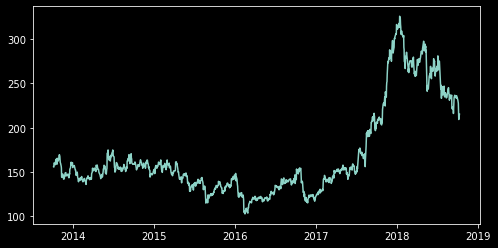

In [3]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

plt.style.use('dark_background')
plt.figure(figsize=(8,4))
plt.plot(df.Close, label='Close price history')

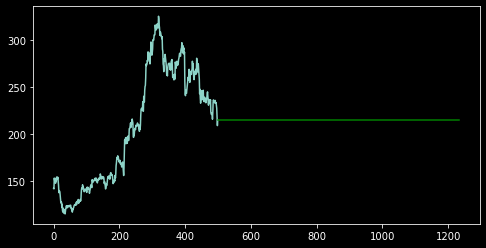

In [10]:
# ARIMA Model

import pmdarima as pm
from pmdarima.model_selection import train_test_split

# split the data
train, test = train_test_split(df.Close, train_size=500)

# train the model
model = pm.auto_arima(np.flip(train), seasonal = False)

# make forecasts
forecasts = model.predict(test.shape[0])


# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(df.Close.shape[0])
plt.figure(figsize=(8,4))
plt.plot(x[:500], np.flip(train))
plt.plot(x[500:], forecasts, c='green')
plt.show()
